<a href="https://colab.research.google.com/github/sgusproject/PythonDataframe-Learn/blob/main/MACD_SMA_EMA_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Phase 1: Create and plot multiple technical indicators

In [ ]:
# Load the data. Downloaded from Yahoo.finance. 
# Note: to make sure download USA date format. Reset computer date format to USA
from google.colab import files
files.upload()

Saving GE_data2.csv to GE_data2 (1).csv


{'GE_data2.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n7/22/2020,6.99,7.09,6.9,7.06,7.031332,65508300\r\n7/23/2020,7.06,7.12,6.97,7.04,7.011413,68628500\r\n7/24/2020,7.02,7.11,6.82,6.86,6.832144,65449500\r\n7/27/2020,6.84,6.85,6.69,6.71,6.682753,70704000\r\n7/28/2020,6.7,6.96,6.69,6.89,6.862021,76033600\r\n7/29/2020,6.99,7,6.52,6.59,6.56324,148442400\r\n7/30/2020,6.5,6.51,6.26,6.26,6.234581,127526900\r\n7/31/2020,6.25,6.29,6,6.07,6.045352,142595300\r\n8/3/2020,6.14,6.19,6.02,6.11,6.085189,89769500\r\n8/4/2020,6.1,6.2,6.1,6.14,6.115067,71041800\r\n8/5/2020,6.17,6.4,6.14,6.4,6.374012,106097200\r\n8/6/2020,6.33,6.42,6.28,6.33,6.304296,69915700\r\n8/7/2020,6.29,6.46,6.25,6.4,6.374012,83064900\r\n8/10/2020,6.43,6.7,6.38,6.67,6.642915,94345000\r\n8/11/2020,6.87,7,6.69,6.73,6.702672,93141500\r\n8/12/2020,6.87,6.88,6.58,6.72,6.692712,70143200\r\n8/13/2020,6.59,6.76,6.59,6.6,6.5732,53428500\r\n8/14/2020,6.54,6.72,6.47,6.66,6.632956,50397200\r\n8/17/2020,6.67,6.69,6.45,6.47,6.443727,590

In [ ]:
# Store the data into array
df = pd.read_csv('GE_data2.csv')
# Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-07-22,7/22/2020,6.99,7.09,6.90,7.06,7.031332,65508300
2020-07-23,7/23/2020,7.06,7.12,6.97,7.04,7.011413,68628500
2020-07-24,7/24/2020,7.02,7.11,6.82,6.86,6.832144,65449500
2020-07-27,7/27/2020,6.84,6.85,6.69,6.71,6.682753,70704000
2020-07-28,7/28/2020,6.70,6.96,6.69,6.89,6.862021,76033600
...,...,...,...,...,...,...,...
2021-07-15,7/15/2021,12.69,12.92,12.57,12.76,12.760000,51390800
2021-07-16,7/16/2021,12.80,12.87,12.52,12.55,12.550000,45530100
2021-07-19,7/19/2021,12.19,12.24,11.82,12.00,12.000000,98897200
2021-07-20,7/20/2021,12.01,12.74,11.99,12.70,12.700000,75083700


In [ ]:
# Create functions to calculate the SMA & EMA
# Create the Simple Moving Average (SMA)
def SMA(data, period=30, column='Close'):
  return data[column].rolling(window=period).mean()

# Create the Exponential Moving Average (EMA)
def EMA(data, period=20, column='Close'):
  return data[column].ewm(span=period, adjust = False).mean()

In [ ]:
# Calculate the Moving Average Convergence/Divergence (MACD)
def MACD(data, period_long=26, period_short=12, period_signal = 9, column='Close' ):
  # Calculate the Short Term Exponential Moving Average 
  ShortEMA = EMA(data, period_short, column=column)
  # Calculate the Long Term Exponential Moving Average
  LongEMA = EMA(data, period_long, column=column)
  # Calculate the Moving Average Convergence/Divergence (MACD)
  data['MACD'] = ShortEMA - LongEMA
  # Calculate the signal line
  data['Signal_Line'] = EMA(data, period_signal, column='MACD')

  return data

In [ ]:
# Create a function to compute the Relative Strenght Index (RSI)
def RSI(data, period = 14, column='Close'):
  delta = data[column].diff(1)
  delta = delta[1:]
  up = delta.copy()
  down = delta.copy()
  up[up <0] = 0
  down[down >0] = 0
  data['up'] = up
  data['down'] = down
  AVG_Gain = SMA(data, period, column = 'up')
  AVG_Loss = abs(SMA(data, period, column = 'down'))
  RS = AVG_Gain / AVG_Loss
  RSI = 100.0 - (100.0/(1.0 + RS))

  data['RSI'] = RSI

  return data


In [ ]:
# Create/ add to the data set
MACD(df)
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df)


In [ ]:
# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_Line,up,down,RSI,SMA,EMA
2020-07-22,7/22/2020,6.99,7.09,6.90,7.06,7.031332,65508300,0.000000,0.000000,NaN,NaN,NaN,NaN,7.060000
2020-07-23,7/23/2020,7.06,7.12,6.97,7.04,7.011413,68628500,-0.001595,-0.000319,0.00,-0.02,NaN,NaN,7.058095
2020-07-24,7/24/2020,7.02,7.11,6.82,6.86,6.832144,65449500,-0.017186,-0.003693,0.00,-0.18,NaN,NaN,7.039229
2020-07-27,7/27/2020,6.84,6.85,6.69,6.71,6.682753,70704000,-0.041171,-0.011188,0.00,-0.15,NaN,NaN,7.007874
2020-07-28,7/28/2020,6.70,6.96,6.69,6.89,6.862021,76033600,-0.045135,-0.017978,0.18,0.00,NaN,NaN,6.996648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-15,7/15/2021,12.69,12.92,12.57,12.76,12.760000,51390800,-0.138289,-0.108485,0.00,-0.05,41.484716,13.280000,13.097886
2021-07-16,7/16/2021,12.80,12.87,12.52,12.55,12.550000,45530100,-0.164525,-0.119693,0.00,-0.21,37.751004,13.228667,13.045707
2021-07-19,7/19/2021,12.19,12.24,11.82,12.00,12.000000,98897200,-0.227080,-0.141170,0.00,-0.55,33.935018,13.163333,12.946116
2021-07-20,7/20/2021,12.01,12.74,11.99,12.70,12.700000,75083700,-0.217662,-0.156469,0.70,0.00,44.036697,13.123000,12.922676


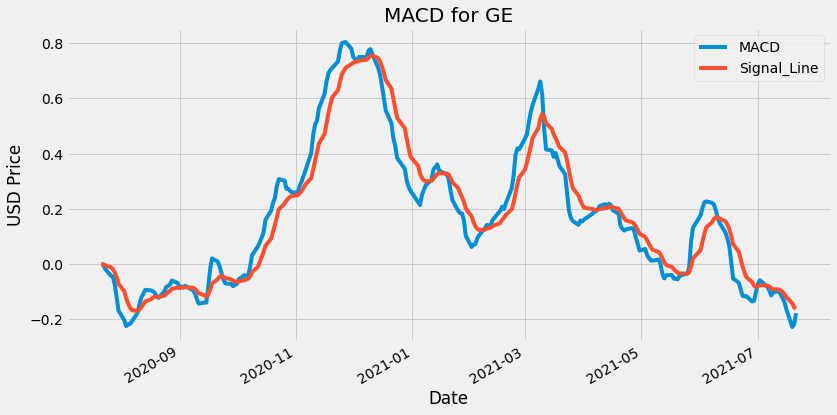

In [ ]:
# Plot the chart
# Create a list of columns to keep
column_list = ['MACD', 'Signal_Line']
df[column_list].plot(figsize = (12.2, 6.4))
plt.title('MACD for GE')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

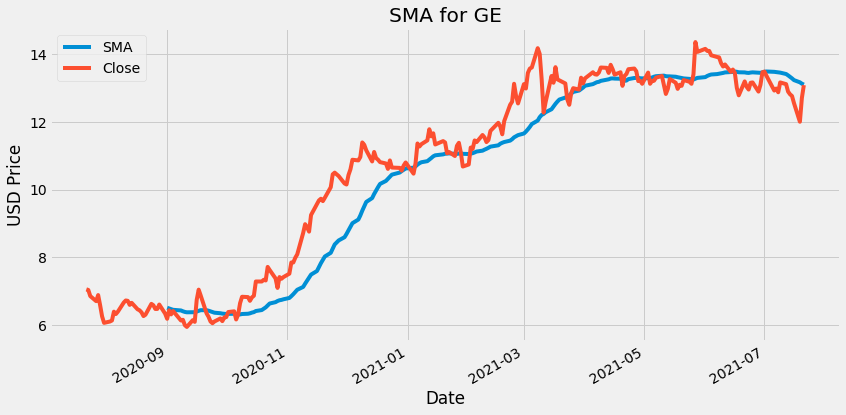

In [ ]:
# Plot the chart
# Create a list of columns to keep
column_list = ['SMA', 'Close']
df[column_list].plot(figsize = (12.6, 6.4))
plt.title('SMA for GE')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show() 

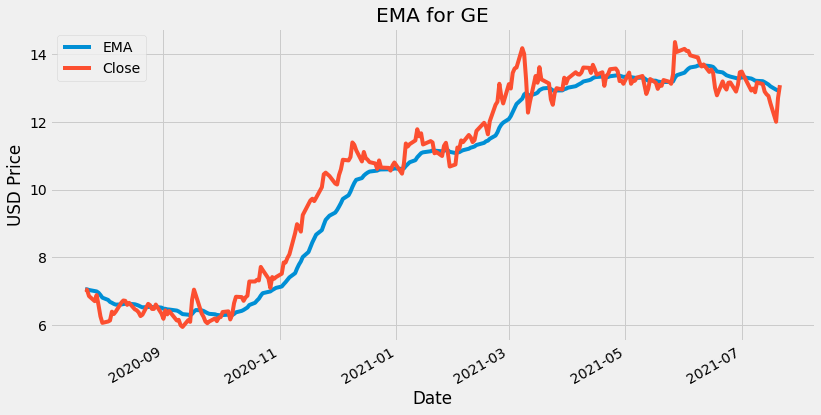

In [ ]:
# Plot the chart
# Create a list of columns to keep
column_list = ['EMA', 'Close']
df[column_list].plot(figsize = (12.2, 6.4))
plt.title('EMA for GE')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

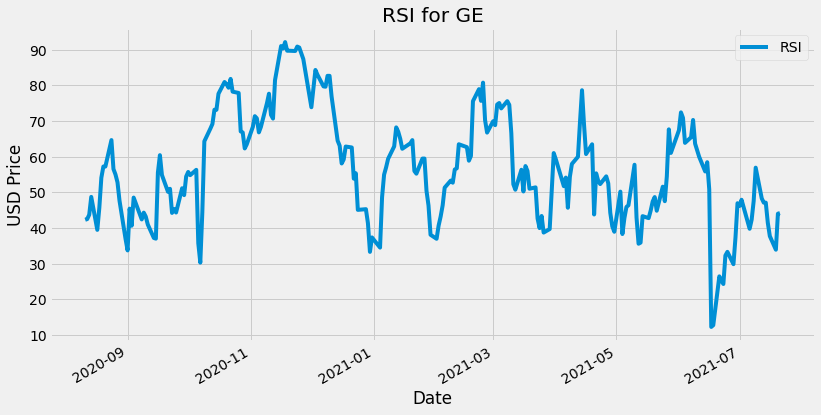

In [ ]:
# Plot the chart
# Create a list of columns to keep
column_list = ['RSI']
df[column_list].plot(figsize = (12.2, 6.4))
plt.title('RSI for GE')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()